# K-Nearest Neighbor

- Supervised Algorithm
- Asks: Who is around me?
- Scaling recommended

Pros:
1. Simple
1. Robust to noise
1. Performs calculations just in time
1. Can be used in quickly changing conditions

Cons:
1. "Correct" value for k is a bit ambiguous
1. High computational cost: Entire training set needs to be held in memory
1. Highly sensitive to the "curse of dimensionality" - fields need to be carefully curated

### Imports

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data

## Acquire

In [3]:
# read Iris data from pydatset
df = data('iris')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'Sepal.Length'}>,
        <AxesSubplot:title={'center':'Sepal.Width'}>],
       [<AxesSubplot:title={'center':'Petal.Length'}>,
        <AxesSubplot:title={'center':'Petal.Width'}>]], dtype=object)

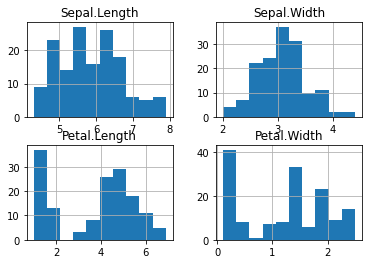

In [6]:
df.hist()

## Prepare

In [7]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Splitting

In [8]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [9]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

## Modeling

#### Create KNN Object

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit the model

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Make predictions

In [12]:
y_pred = knn.predict(X_train)

#### Estimate Probability

In [13]:
y_pred_proba = knn.predict_proba(X_train)

## Evaluation

#### Compute Accuracy

In [14]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.99


#### Confusion Matrix

In [15]:
print(confusion_matrix(y_train, y_pred))

[[28  0  0]
 [ 0 27  1]
 [ 0  0 28]]


#### Classification Report

In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.96      0.98        28
   virginica       0.97      1.00      0.98        28

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



## Replicating the KNN Algorithm With our Neural Network

In [17]:
# Four labeled observations (made up data))
samples = pd.DataFrame({'a': [5.7, 5.5, 6.3], 
                        'b': [2.6, 3.5, 2.8], 
                        'c': [3.5, 1.3, 5.1], 
                        'd': [1.0, 0.2, 1.5], 
                        'target': ['versicolor', 'setosa', 'virginica']
                       })


samples

,a,b,c,d,target
0,5.7,2.6,3.5,1.0,versicolor
1,5.5,3.5,1.3,0.2,setosa
2,6.3,2.8,5.1,1.5,virginica


Now we train our brain's neural network by staring at the data and trying to develop some insight

Excellent, now that our personal algorithm has been fit to the data, lets look at unseen data:

In [18]:
new_obs = pd.DataFrame([[6.3, 2.8, 5.1, 1.4], 
                       [6.25, 2.77, 5.09, 1.35], 
                       [5.5, 3.5, 1.29, 0.3]], 
                        columns = ['a', 'b', 'c', 'd'])

new_obs

,a,b,c,d
0,6.30,2.80,5.10,1.40
1,6.25,2.77,5.09,1.35
2,5.50,3.50,1.29,0.30


Time to thing label. Which prediction should we make for each of these new observations?

KNN uses a distance formula to compute the euclidean distance and find the K sample/labeled observations with the shortest distances. Then it asks, of those K samples, which species is most common (i.e. what is the mode of those neighbors)?

## Validation

Compute the accuracy of the model when run on the validate dataset.

In [19]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.97


## Visualizing the Model

Lets look at different K values

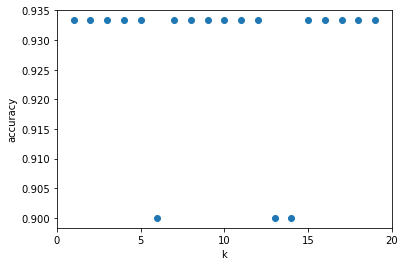

In [20]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

## Exercise Time